<a href="https://colab.research.google.com/github/427paul/ai_agent/blob/main/03_LangChain_%EA%B8%B0%EC%B4%882.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Memory & Chain**

- 메모리를 사용하기 위해서는 Chain으로 엮어야 함 (LLM과 메모리 엮기)

**자주 사용되는 메모리 종류**
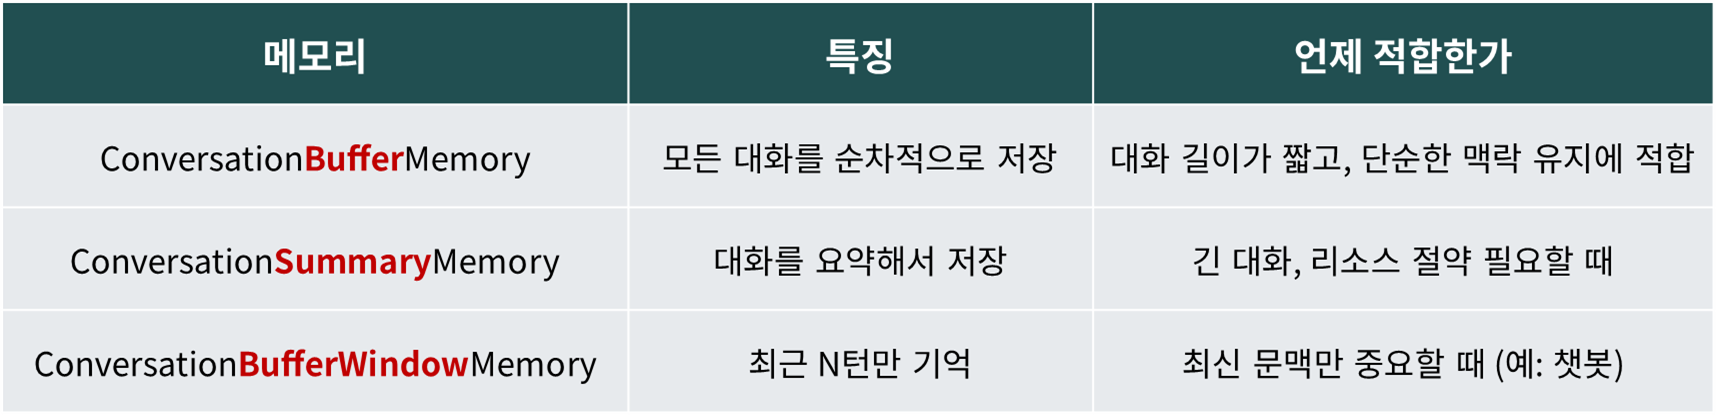

## **1.환경준비**

### (1) 라이브러리

#### 1) 필요한 라이브러리 설치

In [ ]:
!pip install langchain langchain-openai langchain_community langchain-huggingface huggingface_hub -q

#### 2) 라이브러리 로딩

In [ ]:
import pandas as pd
import numpy as np
import os
import openai

from langchain.memory import ConversationBufferMemory
from langchain.prompts.chat import ChatPromptTemplate
from langchain.chains import ConversationChain
from langchain_openai import ChatOpenAI
from langchain_huggingface import HuggingFaceEndpoint, ChatHuggingFace

### (2) API Key 설정

* API 키 설정은 다음 둘 중 한가지를 수행해야 합니다.
    * 허깅페이스 키 : 무료, 사용 제한 있음
    * OpenAI 키 : 유료

* 허깅페이스

In [ ]:
# hf key 설정
# os.environ["HUGGINGFACEHUB_API_TOKEN"] = ""
os.environ["HF_TOKEN"] = ""

* openai

In [ ]:
# openai api key
os.environ["OPENAI_API_KEY"] = ""

### (3) 모델 준비

* 허깅페이스

In [ ]:
# HuggingFace에서 해당 모델을 불러오는 엔드포인트 지정
llm_ep = HuggingFaceEndpoint(repo_id="openai/gpt-oss-20b", task="conversational")

# HuggingFace에서 가져온 모델을 그대로 쓰지 않고,
# LangChain에서 쉽게 쓰도록 감싸는(wrapper) 단계
llm1 = ChatHuggingFace(llm=llm_ep)

* OpenAI

In [ ]:
llm2 = ChatOpenAI(model = "gpt-4.1-mini")

## **2.Memory**

### (1) 메모리가 없을때

* 허깅페이스

In [ ]:
result = llm1.invoke("안녕? 나는 핑크퐁이야.")
print(result.content)

In [ ]:
result = llm1.invoke("내 이름이 뭐라고?")
print(result.content)

* openai

In [ ]:
result = llm2.invoke("안녕? 나는 핑크퐁이야.")
print(result.content)

In [ ]:
result = llm2.invoke("내 이름이 뭐라고?")
print(result.content)

### (2) 메모리1 : ConversationBufferMemory

In [ ]:
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory

* 허깅페이스

In [ ]:
# 메모리 준비
memory1 = ConversationBufferMemory()

# 체인 준비
chain1 = ConversationChain(llm = llm1, memory = memory1)

# 대화 시작
print(chain1.run("안녕? 나는 핑크퐁이야."))

In [ ]:
print(chain1.run("내 이름이 뭐라고?"))

* 메모리 내용 열어보기

In [ ]:
# 담긴 메모리 확인하기
memory1.chat_memory.messages

In [ ]:
print(memory1.buffer)

In [ ]:
# 프롬프트에 포함되는 내용
memory1.load_memory_variables({})

### (3) 메모리2 : ConversationSummaryMemory

In [ ]:
from langchain.memory import ConversationSummaryMemory

In [ ]:
# 요약 메모리 생성 (요약용 LLM 필요)
memory2 = ConversationSummaryMemory(llm = llm1)

# 체인 구성
chain2 = ConversationChain(llm = llm1, memory = memory2)

In [ ]:
# 대화
print(chain2.run("오늘은 운동하고, 친구랑 밥도 먹고, 강의도 들었어."))

In [ ]:
# 담긴 메모리 확인하기
memory2.chat_memory.messages

In [ ]:
print(chain2.run("내가 오늘 뭐했는지 기억나?"))

In [ ]:
print(chain2.run("너는 어떻게 지냈어?"))

In [ ]:
# 담긴 메모리 확인하기
memory2.chat_memory.messages

In [ ]:
# 내용 요약
print(memory2.buffer)

In [ ]:
# 프롬프트에 포함되는 내용.
memory2.load_memory_variables({})

### (4) 메모리3 : ConversationBufferWindowMemory

In [ ]:
from langchain.memory import ConversationBufferWindowMemory

In [ ]:
# k 턴
k = 2

# 최근 2턴만 기억하는 메모리
memory3 = ConversationBufferWindowMemory(k = k)
chain3 = ConversationChain(llm = llm1, memory = memory3)

# 대화
print(chain3.run("나는 핑크퐁이야."))

In [ ]:
# 프롬프트에 포함되는 내용
memory3.load_memory_variables({})

In [ ]:
print(chain3.run("내가 좋아하는 색은 파란색이야."))
print('-'*100)
memory3.load_memory_variables({})

In [ ]:
print(chain3.run("나는 영화보는 것을 좋아해"))
print('-'*100)
memory3.load_memory_variables({})

In [ ]:
print(chain3.run("내 이름이 뭐라고?"))
print('-'*100)
memory3.load_memory_variables({})

### (5) 반복문 안에서 질문답변 이어가기

In [ ]:
# 요약 메모리 생성 (요약용 LLM 필요)
memory = ConversationSummaryMemory(llm = llm1)

# 체인 구성
chain = ConversationChain(llm = llm1, memory = memory)

In [ ]:
while True:
    query = input('질문 : ')
    query = query.strip()
    print('-' * 100)
    if len(query) == 0:
        break
    result = chain.run(query)
    print(f'답변 : {result}')
    print('=' * 100)

### (6) 😀실습

* 실습1 : ConversationSummaryMemory
    * 오늘 하루 동안 한 일을 여러 문장으로 말하고
    * 이어서 "오늘 내가 뭐했지?"라고 질문하세요.
    * 요약된 대화를 통해 LLM이 잘 정리해서 응답하는지 확인하세요.

* 실습2 : ConversationBufferWindowMemory
    * k를 임의로 설정하고,
    * 좋아하는 영화, 좋아하는 음악, 좋아하는 책 등 여러 대화를 한 다음
    * 첫번째 나눈대화에 대해서 질문하기

## 3.[참고] LCEL

**LCEL(LangChain Expression Language)**
- 체인, 모델, 파서, 프롬프트 등 여러 구성요소를 파이프라인처럼 | 연산자로 연결할 수 있는 표현식 기반 체인 구성 방식


In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.schema import StrOutputParser

# 1. 프롬프트 템플릿
prompt = ChatPromptTemplate.from_template(
    "장르가 {genre}인 영화를 하나만 추천해줘."
)

# 2. 모델
llm = ChatOpenAI(model_name="gpt-4.1-mini", temperature=0.7)

# 3. 파서
parser = StrOutputParser()

# 4. LCEL 체인 구성
chain = prompt | llm | parser

# 5. 실행
result = chain.invoke({"genre": "액션"})
print(result)
